# **Heart Failure Prediction ML Project - My Company**
#### An End-to-End Machine Learning Classification Workflow for Heart Failure Prediction Analysis
#### My Company ####

***Contributors to this Notebook:*** Ayo Kehinde Samuel

## Results
### Assumptions of the Analysis
### Expected Results
1. A predictive model that predicts the probability of the existence of a possible heart disease.
 - Data variable definition
 
    - Age : age [years]
    - anaemia : Decrease of red blood cells or hemoglobin (boolean)
    - creatinine_phosphokinase : Level of the CPK enzyme in the blood (mcg/L)
    - diabetes : If the patient has diabetes (boolean)
    - ejection_fraction : Percentage of blood leaving the heart at each contraction (percentage)
    - high_blood_pressure : If the patient has hypertension (boolean)
    - platelets : Platelets in the blood (kiloplatelets/mL)
    - serum_creatinine : Level of serum creatinine in the blood (mg/dL)
    - serum_sodium : Level of serum sodium in the blood (mEq/L)
    - sex : Woman or man (binary)
    - smoking : If the patient smokes or not (boolean)
    - time : Follow-up period (days)
    - DEATH_EVENT : If the patient deceased during the follow-up period (boolean)
2. A documented API for interacting with this model that returns predictions based on input variables

***This notebook solution is divided into 4 Sections, each constituting a workflow on its own:***

- Part I: Initial Data Analysis and Preprocessing
- Part II: EDA and Hypothesis testing
- Part III: Modelling Methodology
- Part IV: Predictions and Exporting

#### <strong>Cumulative WORK FLOW</strong>
1. Import libaries and Data
2. Data inspection
3. EDA - univariate graphical Exploration and visualization
    - Data cleaning
    - Data manipulation
    - Feature engineering
    - Hypothesis testing
4. Modelling & Prediction using XgBboost, LGBM, Logistic, SVC, Gradient Booster, Random Forest
5. Model evaluation

#### Setup

##### <strong>Library import</strong>
Import all the required Python libraries.

It is a good practice to organize the imported libraries by functionality, as shown below.

In [1]:
#local libraries for system runtime
import time, datetime,os,sys,math,itertools,warnings,random,gc

#Data manipulation
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#636EFB','#FFFFFF']
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


#feature engineering/scaling
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# modelling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from flaml import AutoML

# evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,RocCurveDisplay
from sklearn.datasets import make_classification 
from sklearn.metrics import precision_recall_curve

#model tracking
from comet_ml import Experiment

import warnings
warnings.filterwarnings("ignore")

In [2]:
SEED = 42
random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)

In [ ]:
#setup comet ml experiment tracking
experiment = Experiment(
    api_key="wYjJoSlp95sucuHrHFSDdD8Fk",
    project_name="DFA_heartfailure_experiment"
)

## Part I: Initial Data Analysis and Preprocessing
<h4><b>Overview</b></h4>

This is the IDA and Preprocessing component of this solution. The workflow for this notebook is outlined as follows: 
- Getting the Data
- First Insights: Making Sense of the Data
- Data Integrity Assessments
- Cleaning the Data

#### 1. Import the Data

In [3]:
df = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

#### 2. Data inspection

In [4]:
df.shape #check the dimension of the dataset

(299, 13)

In [5]:
df.columns #check dataset columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
df.info() #check dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe().T #statistical summary of the dataset

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

In [8]:
df.nunique(axis=0).sort_values().to_frame() #check for unique values and sort them into frames

0
anaemia                     2
diabetes                    2
high_blood_pressure         2
sex                         2
smoking                     2
DEATH_EVENT                 2
ejection_fraction          17
serum_sodium               27
serum_creatinine           40
age                        47
time                      148
platelets                 176
creatinine_phosphokinase  208

In [9]:
df.isnull().mean()*100

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

In [10]:
missing_values = df.isnull().sum() #check for missing values and sort them into frames
missing_table = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
missing_table

Column  Missing Values
0                        age               0
1                    anaemia               0
2   creatinine_phosphokinase               0
3                   diabetes               0
4          ejection_fraction               0
5        high_blood_pressure               0
6                  platelets               0
7           serum_creatinine               0
8               serum_sodium               0
9                        sex               0
10                   smoking               0
11                      time               0
12               DEATH_EVENT               0

## Part II: Exploratory Data Analysis and Feature Selection
<h4><b>Overview</b></h4>

This is the EDA and Feature Engineering component of this solution. The workflow for this notebook is outlined as follows:
   - univariate visualization
   - multivariate visualization
   - Feature engineering

In [11]:
df['age'] = df['age'].astype(int)
df['platelets'] = df['platelets'].astype(int)
df_eda = df.copy(deep = True)

In [12]:
df_eda.loc[df_eda['DEATH_EVENT']==0,'Status']='Survived'
df_eda.loc[df_eda['DEATH_EVENT']==1,'Status']='Not Survived'

In [13]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time


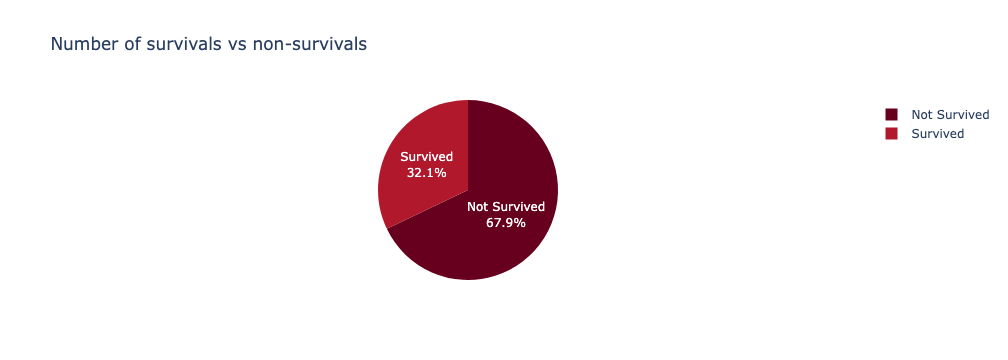

In [14]:
fig = px.pie(values=df_eda['Status'].value_counts(), 
             title='Number of survivals vs non-survivals',
             names=df_eda['Status'].unique(),
            color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

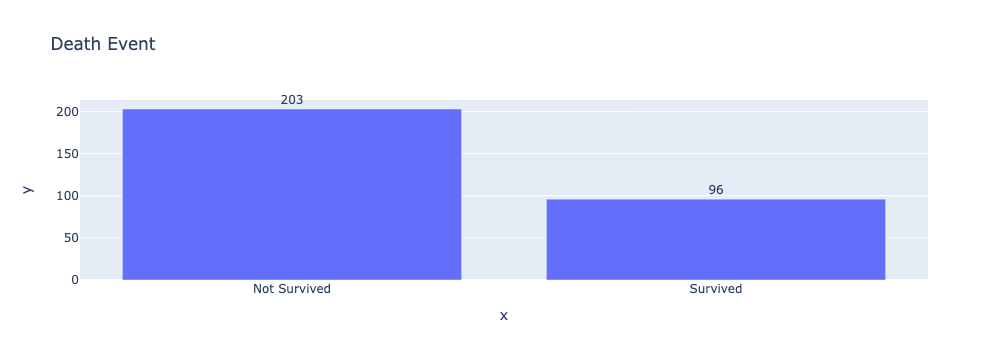

In [15]:
fig = px.bar(df_eda, x=df_eda['Status'].unique(),
             title="Death Event", barmode='group',
             text_auto=True,
             y=df_eda['Status'].value_counts())
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(barmode='group')
fig.show()

- The dataset has very low data points (299)
- The dataset is unbalanced with 2:1 ratio for No Death Event cases : Death Event cases
- Visualizations and Predictions will be biased towards No Death Event cases.

In [180]:
def catplot(df, x):   
    # Create subplots
    fig = make_subplots(
       rows=1, cols=2,
       specs=[[{"type": "pie"}, {"type": "histogram"}]]
    )

    fig.add_trace(go.Pie(
            labels=df[x].value_counts().index,
            values=df[x].value_counts(),
            pull=[0.1, 0],
            marker=dict( line=dict(color='#FFFFFF', width=2))
        ),row=1, col=1)
    anaemia_values = df[x].unique()
    status_values = df['Status'].unique()

    data = []
    for status in status_values:
        for anaemia in anaemia_values:
            subset = df_eda[(df_eda[x] == anaemia) & (df_eda['Status'] == status)]
            fig.add_trace(go.Histogram(x=subset[x],
                                     nbinsx=2,
                                  
                                     name=f'{status} {anaemia}',
                                     text=subset.groupby(x).size(),
                                     ), row=1, col=2)
          

    fig.update_layout(bargap=0.2, barmode='group', width=1000,
                     title = x + ' vs Death Event')
    fig.show()

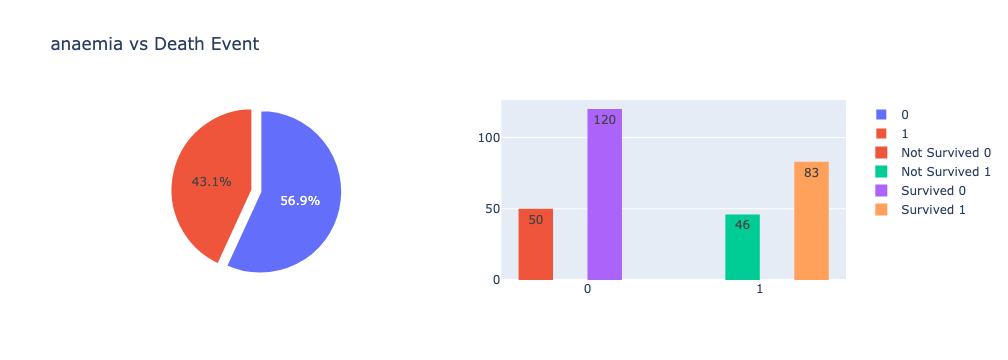

In [181]:
catplot(df_eda,'anaemia')

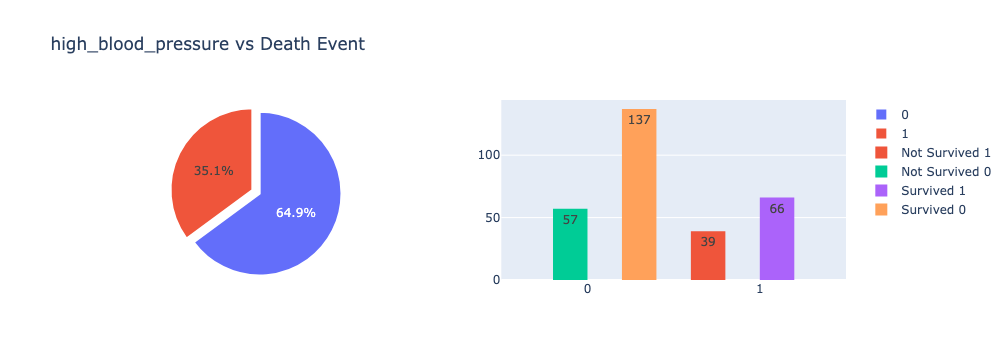

In [158]:
catplot(df_eda,'high_blood_pressure')

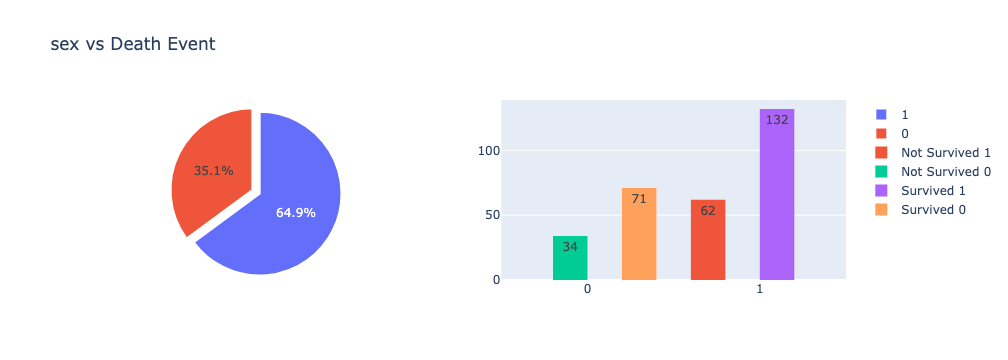

In [159]:
catplot(df_eda,'sex')

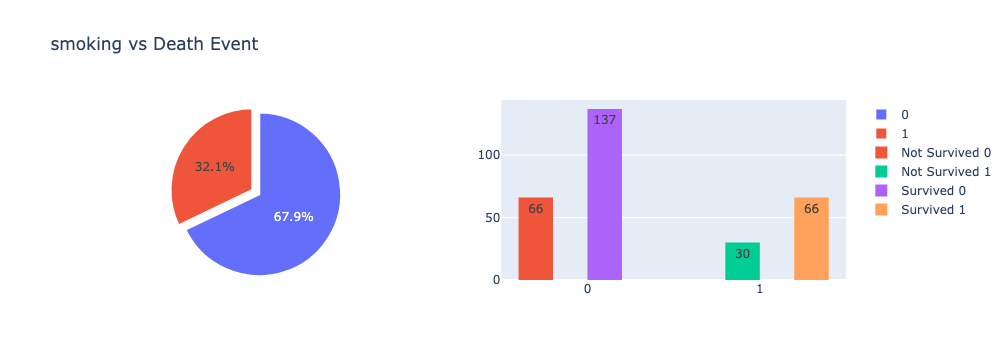

In [160]:
catplot(df_eda,'smoking')

##### Summary
Categorical Features Insight :
- All the graphs have the same pattern
- There are more cases of male population

Categorical Features Sumary :
- Anaemia = No Anaemia
- Diabetes = No Diabetes
- High Blood Pressure > No High Blood Pressure (Needs more data)
- Male > Female
- No Smoking > Smoking

Genaral Information
- High chances of heart failures due to anaemia.
- High chances of heart failures due to diabetes.
- High chances with heart failures due to high blood pressure.
- male > female but by small margin are prone to more heart failures.
- Smoking increases the chances of suffering from heart failures.

In [23]:
# Numerical Plot
def numplot(df,x,scale):
    sns.set(style='whitegrid')
    fig = plt.subplots(2,1,figsize = (15,11))
    plt.subplot(2,1,1)
    ax=sns.histplot(data=df, x=x, kde=True,color=colors[0],edgecolor = 'k')
    ax.bar_label(ax.containers[0])
    tit=x + ' distribution'
    plt.title(tit)
    plt.subplot(2,1,2)
    tar=x + '_group'
    Tstr= str(scale)
    tit2=x + ' vs Death Event ( ' + Tstr + ' : 1 )'
    df[tar] = [ int(i / scale) for i in df[x]]
    ax=sns.countplot(data=df, x=tar, hue='Status',palette = colors,edgecolor = 'k')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(tit2)

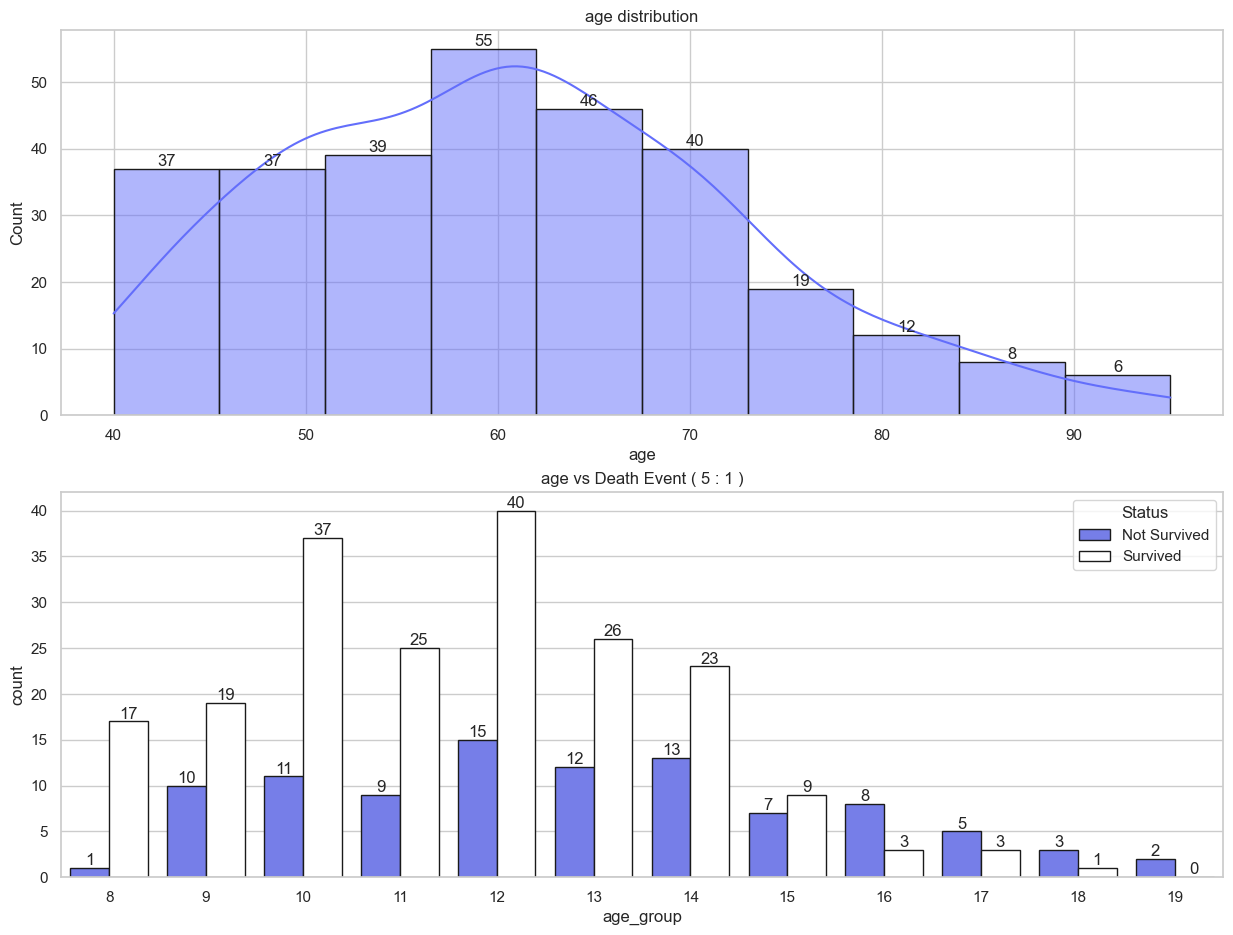

In [24]:
numplot(df_eda,'age',5)

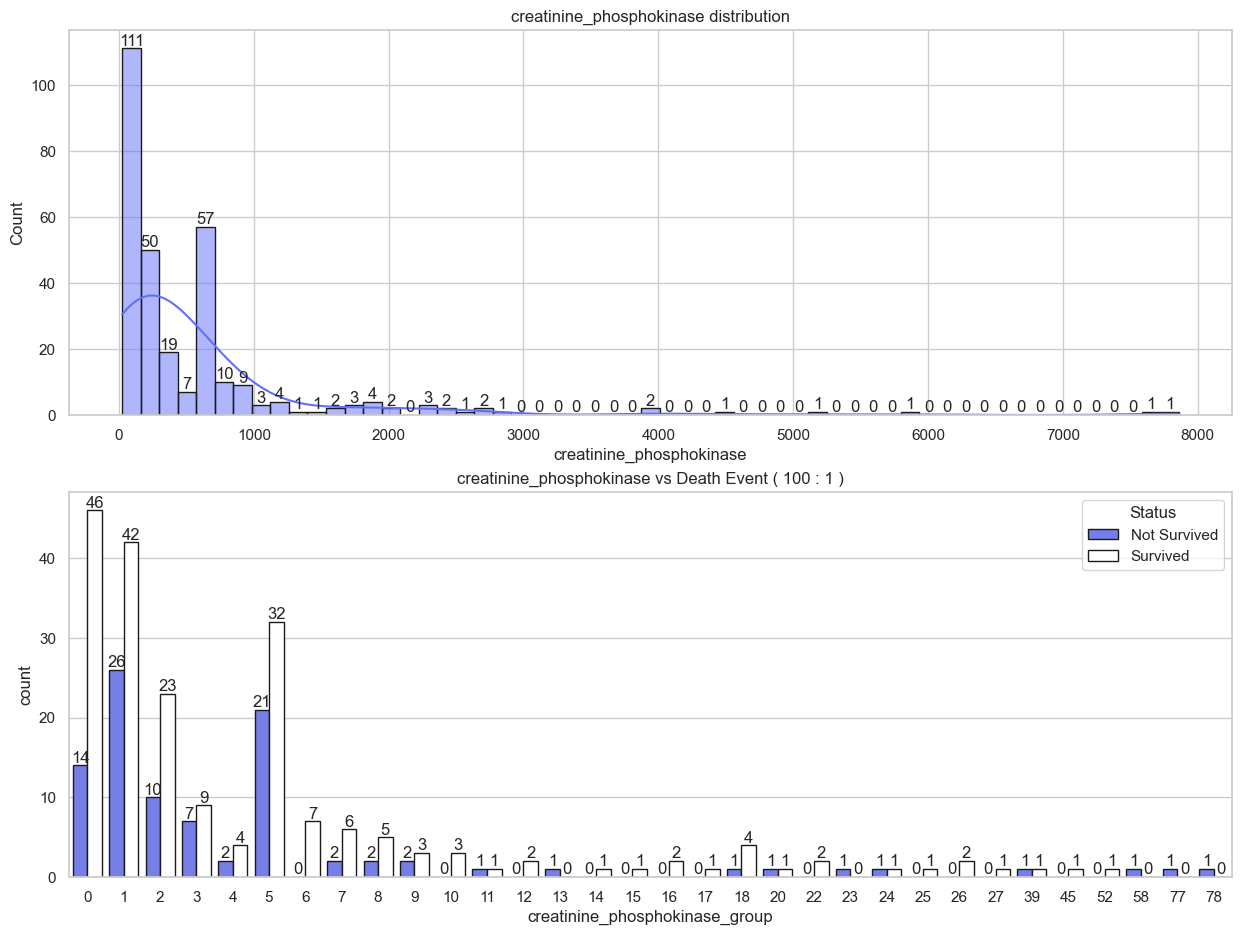

In [25]:
numplot(df_eda,'creatinine_phosphokinase',100)

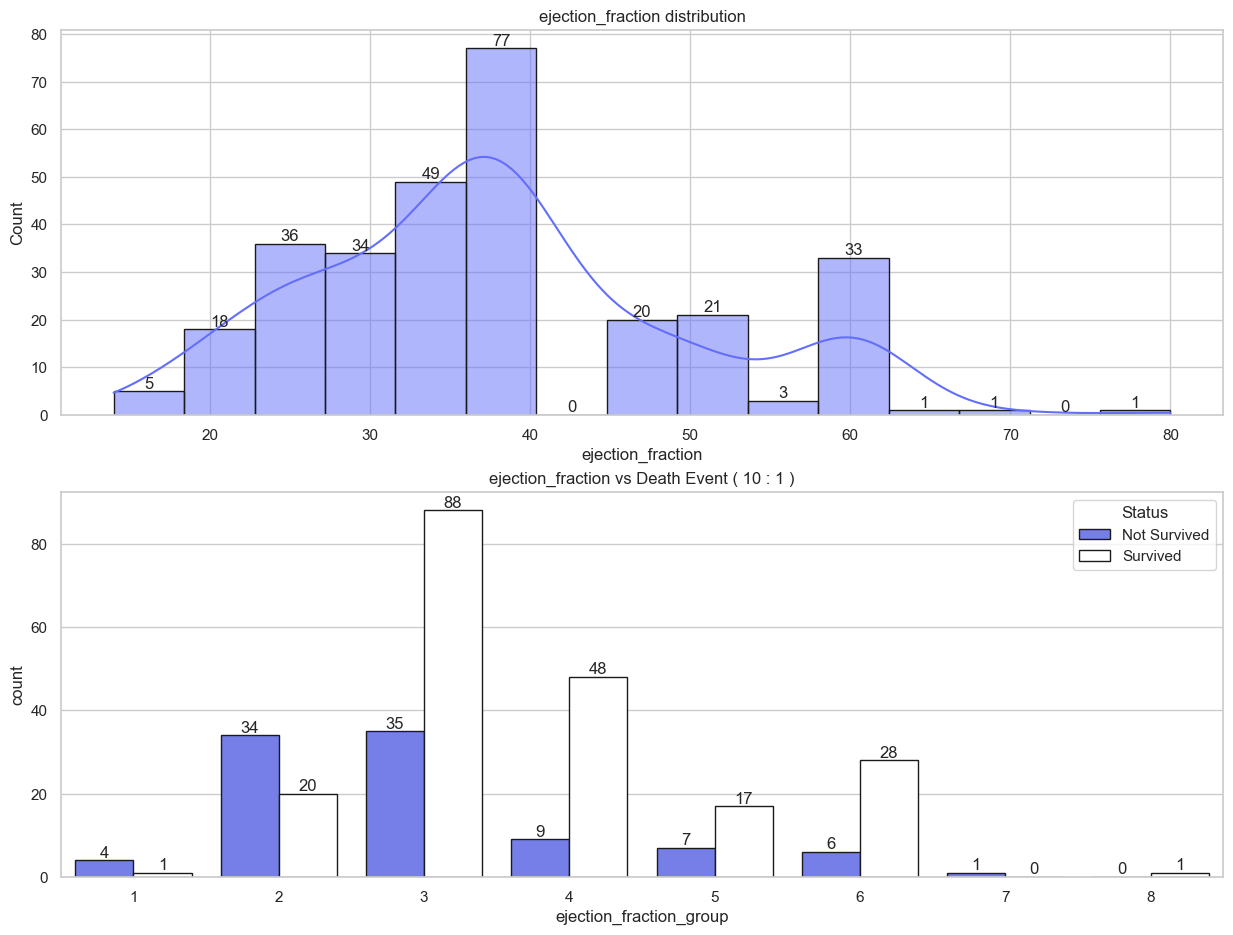

In [26]:
numplot(df_eda,'ejection_fraction',10)

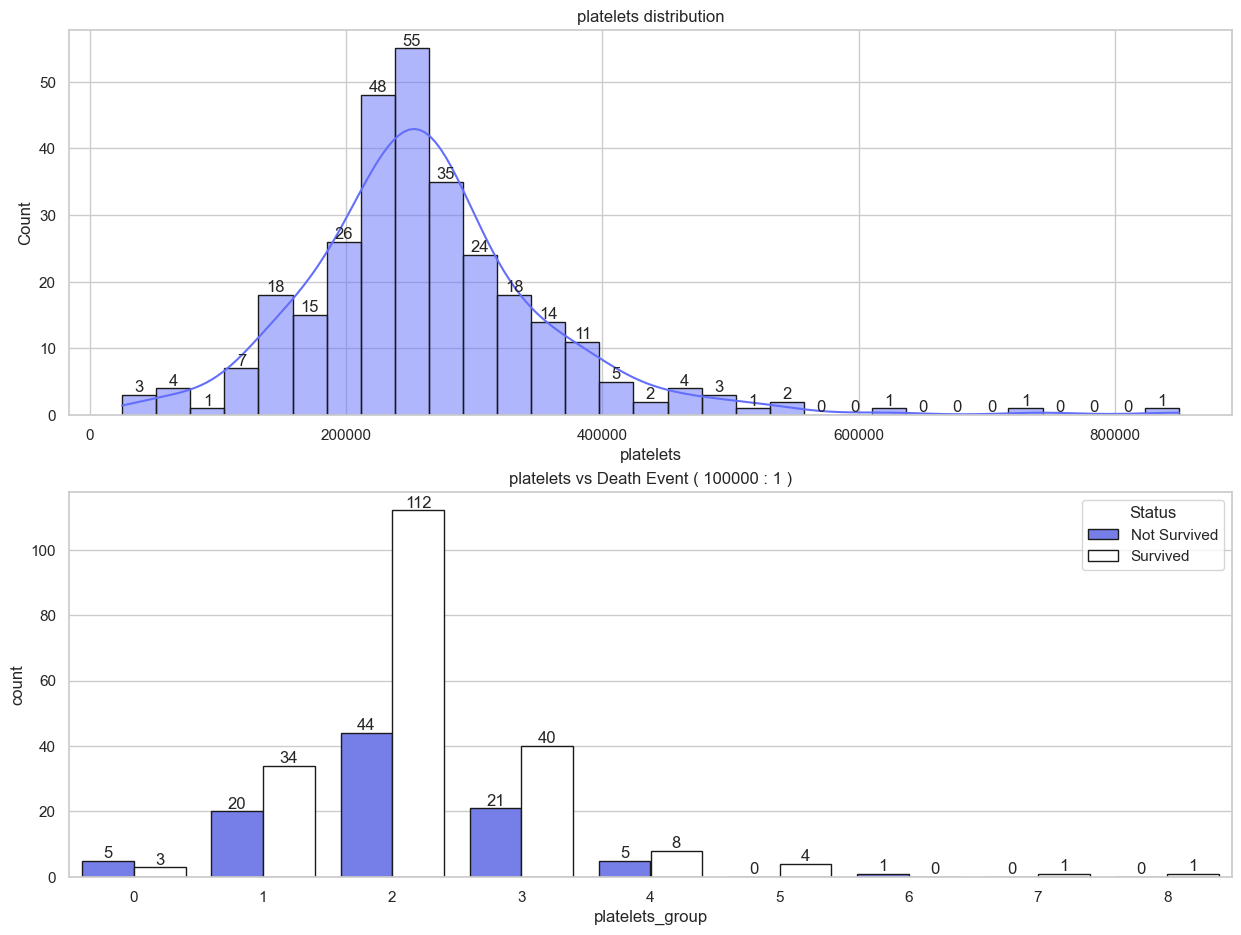

In [27]:
numplot(df_eda,'platelets',10**5)

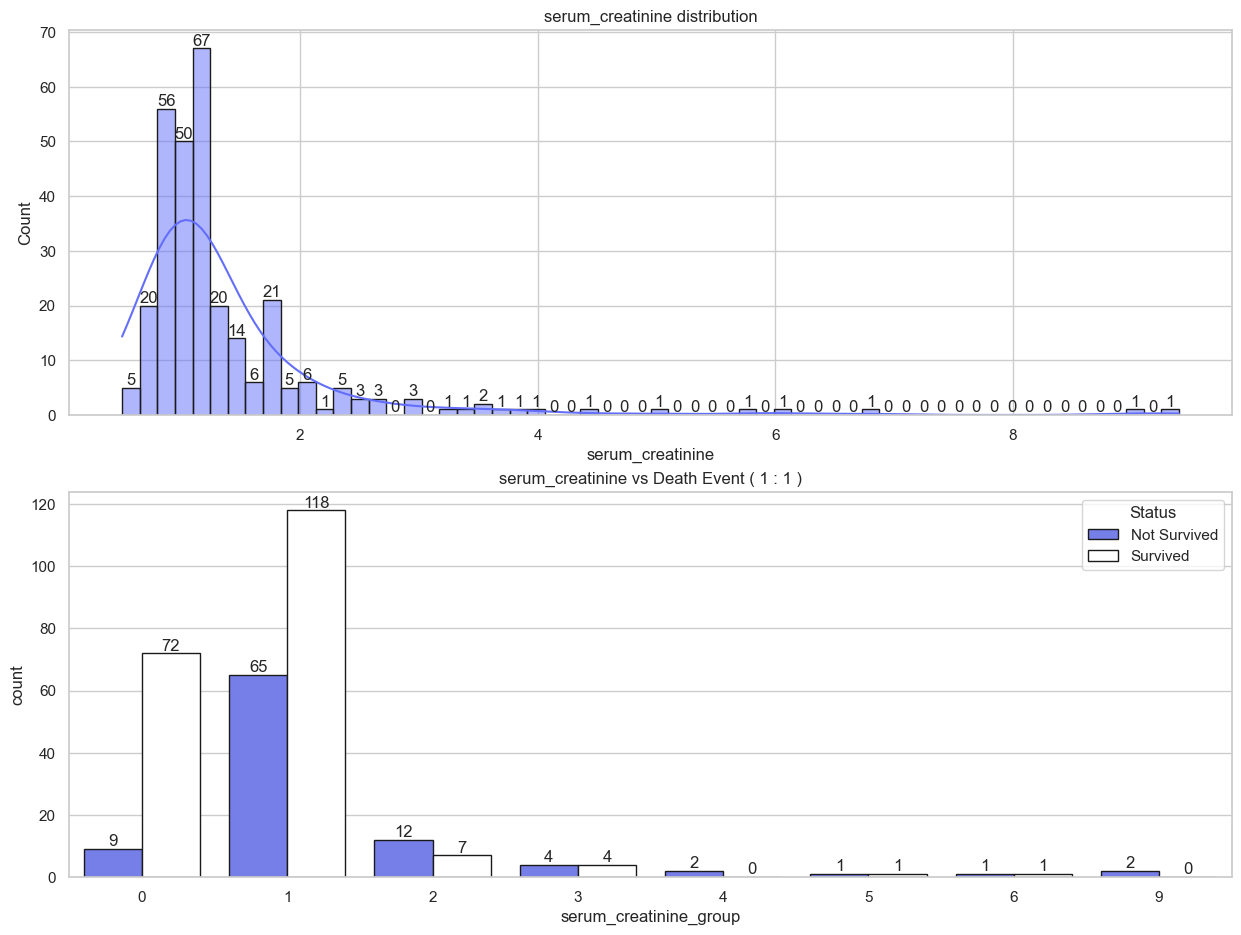

In [28]:
numplot(df_eda,'serum_creatinine',1)

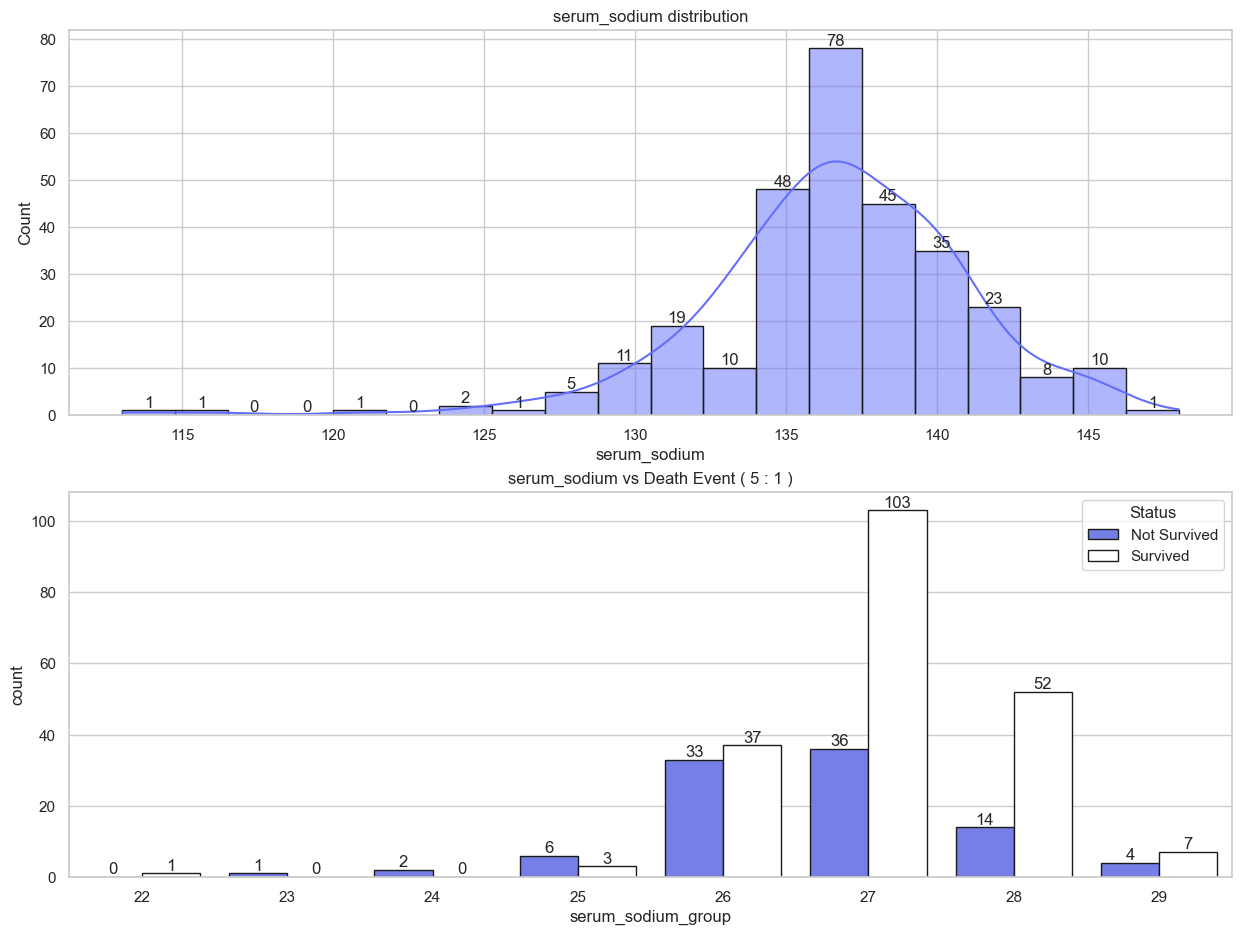

In [29]:
numplot(df_eda,'serum_sodium',5)

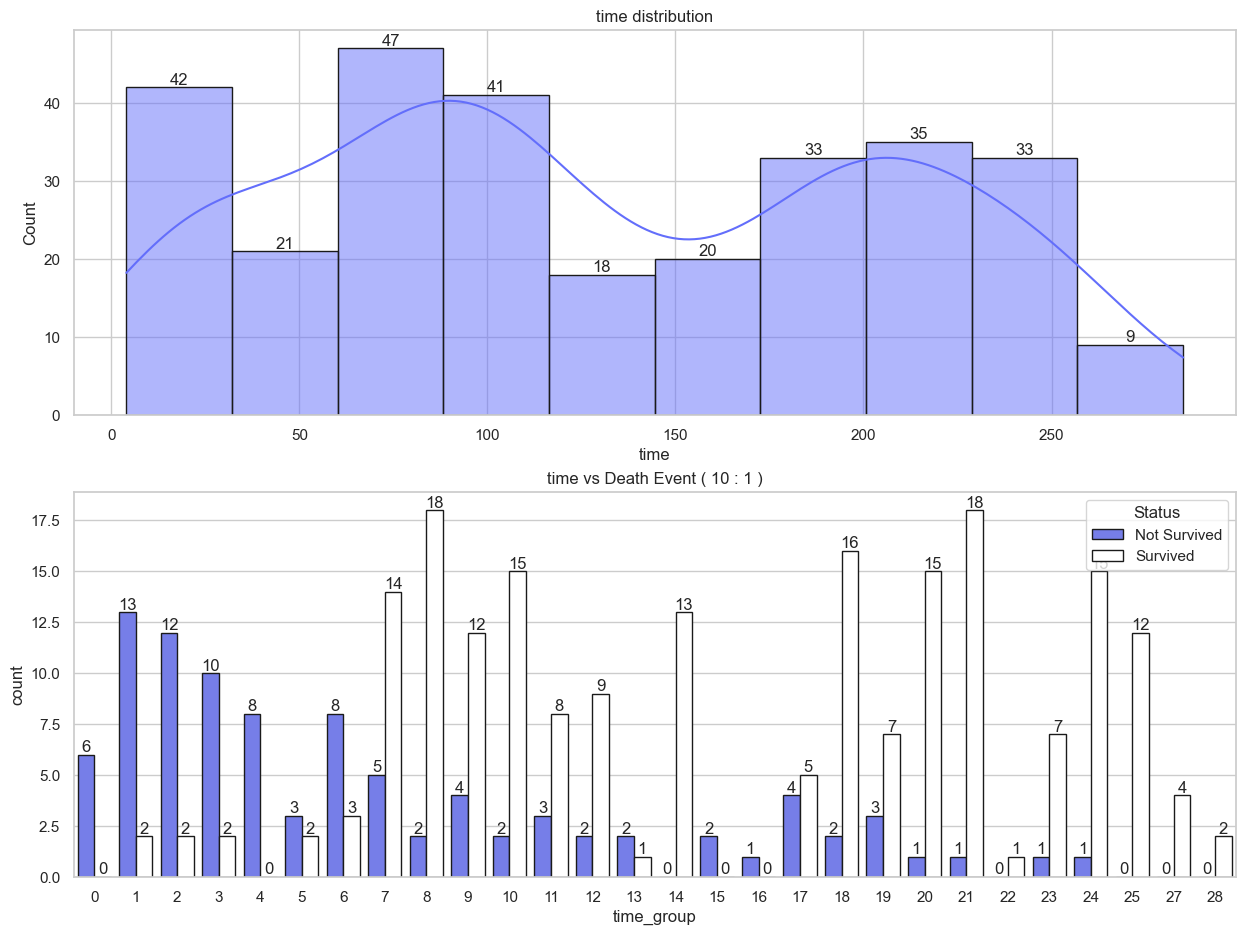

In [30]:
numplot(df_eda,'time',10)

##### Summary
Numerical Features Insight :
- Cases of DEATH_EVENT initiate from the age of 45. Some specific peaks of high cases of
- DEATH_EVENT can be observed at 45, 50, 60, 65, and 70
- High cases of DEATH_EVENT can be observed for ejaction_fraction values from 20 - 60.
- serum_creatinine values from 0.6 to 3.0 have higher probability to lead to DEATH_EVENT.
- serum_sodium values 127 - 145 indicate towards a DEATH_EVENT due to heart failure.
- DEATH_EVENT cases are on a high for the values between 0(0x100) - 500(5x100) for creatinine_phosphokinase.
- platelets values between 0(0x10^5) - 400,000(4x10^5) are prone to heart failures leading to DEATH_EVENT.
- For the time feature, values from 0(0x10) - 60(6*10) have higher probability to lead to a DEATH_EVENT.

Categorical Features Sumary :
- age : 50 - 70
- creatinine_phosphokinase : 0 - 500
- ejaction_fraction : 20 - 40
- platelets : 200,000 - 300,000
- serum_creatinine : 1 - 2
- serum_sodium : 130 - 140
- time : 0 - 50


General Information
- age : General aging leads to heart failures.
- creatinine_phosphokinase : > 120 mcg/L
- ejection_fraction : Normal Range 55% - 70%. Below 55% is prone to heart failures.
- platelets : Low and very high values of platelets led to heart failure.
- serum_creatinine : 0.8 - 1.7 (mg/dL) is the range of values that leads to most heart failures.
- serum_sodium : Above 130 (mEq/L), chances of heart failure increases by alot.
- time : Ideal follow-up period is of 14 days. Anything above 14 days can lead to worse situations.

#### Feature engineering

In [31]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization
# Normalization
df_eda['age'] = mms.fit_transform(df_eda[['age']])
df['creatinine_phosphokinase'] = mms.fit_transform(df_eda[['creatinine_phosphokinase']])
df_eda['ejection_fraction'] = mms.fit_transform(df_eda[['ejection_fraction']])
df_eda['serum_creatinine'] = mms.fit_transform(df_eda[['serum_creatinine']])
df_eda['time'] = mms.fit_transform(df_eda[['time']])
# Standardization
df_eda['platelets'] = ss.fit_transform(df_eda[['platelets']])
df_eda['serum_sodium'] = ss.fit_transform(df_eda[['serum_sodium']])
df_eda.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  0.636364        0                       582         0           0.090909   
1  0.272727        0                      7861         0           0.363636   
2  0.454545        0                       146         0           0.090909   
3  0.181818        1                       111         0           0.090909   
4  0.454545        1                       160         1           0.090909   

   high_blood_pressure     platelets  serum_creatinine  serum_sodium  sex  \
0                    1  1.681651e-02          0.157303     -1.504036    1   
1                    0 -2.740240e-07          0.067416     -0.141976    1   
2                    0 -1.038073e+00          0.089888     -1.731046    1   
3                    0 -5.464741e-01          0.157303      0.085034    1   
4                    0  6.517986e-01          0.247191     -4.682176    0   

   ...      time  DEATH_EVENT        Status age_group  \
0  ...  0.000000            1  Not Survived        15   
1  ...  0.007117            1  Not Survived        11   
2  ...  0.010676            1  Not Survived        13   
3  ...  0.010676            1  Not Survived        10   
4  ...  0.014235            1  Not Survived        13   

   creatinine_phosphokinase_group  ejection_fraction_group  platelets_group  \
0                               5                        2                2   
1                              78                        3                2   
2                               1                        2                1   
3                               1                        2                2   
4                               1                        2                3   

   serum_creatinine_group  serum_sodium_group  time_group  
0                       1                  26           0  
1                       1                  27           0  
2                       1                  25           0  
3                       1                  27           0  
4                       2                  23           0  

[5 rows x 21 columns]

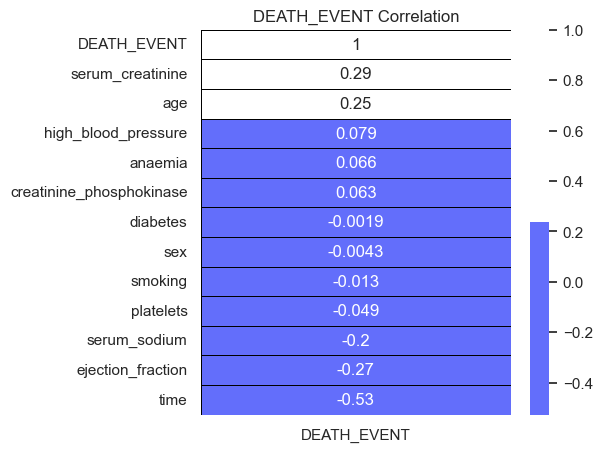

In [32]:
corr = df.corrwith(df['DEATH_EVENT']).sort_values(ascending = False).to_frame()
corr.columns = ['DEATH_EVENT']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('DEATH_EVENT Correlation');

#### Deductions

Features like: 
- high_blood_pressure, 
- anaemia, 
- creatinine_phosphokinase, 
- diabetes, 
- sex,
- smoking, and 
- platelets 

do not display any kind of correlation with DEATH_EVENT.

Based on this suggestions by the data, I will create 2 models :

1. statistically backed: I will drop the following features : high_blood_pressure, anaemia,
creatinine_phosphokinase, diabetes, sex, smoking, and platelets.

2. Based on the General information: I will drop the following features : sex, platelets.

In [33]:
df1=df.copy()
df2=df.copy()
# Dataset for model based on Statistical Test :
df1 = df1.drop(columns = ['anaemia', 'diabetes', 'high_blood_pressure','creatinine_phosphokinase', 'sex', 'smoking','platelets'])
# Dataset for model based on General Information :
df2 = df2.drop(columns = ['sex','platelets'])

In [34]:
over = SMOTE()
f1 = df1.iloc[:,:5].values
t1 = df1.iloc[:,5].values
f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({1: 203, 0: 203})

In [35]:
over = SMOTE()
f2 = df2.iloc[:,:10].values
t2 = df2.iloc[:,10].values
f2, t2 = over.fit_resample(f2, t2)
Counter(t2)

Counter({1: 203, 0: 203})

## Part III: Modelling Methodology
<h4><b>Overview</b></h4>
This is the Machine Learning component of this solution. The workflow for this notebook is outlined as follows:

 - Data splitting
 - Model Experimentations, Prediction
 - Prediction Leaderboard Ranking 
 - Holdout Evaluation
 
Several algorithms I will consider for prediction.

* XGBoost (Extreme Gradient Boosting Machine) - It is my defacto go to anytime!
* LGBMClassifier
* Logistic Regression
* Gradient Booster Classifier
* Random Forest Classifier
* Support Vector Classifier


##### 1. Data Split

However, to evaluate which model works best on our data, we split our data into 3 parts - - `train`, `validation`, `hold out`

* `Train set`: This data is used to train the model and later fit it on it. The model learns from the training data.
* `Validation set`: Validation data is used for hyperparameter tuning of a model, where the various input values to the model are fine-tuned to achieve higher performance. Model performance and evaluation takes place using the validation data. This can be later used for training again.
* `Holdout set`: The holdout set is used for testing the final solution in order to confirm the actual predictive power of the model.

In this case we split the data into 50:30:20 (Train: validation : Holdout) sets.

In [36]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state=SEED)
_, x_hold1, _, y_hold1 = train_test_split(x_train1, y_train1, test_size = 0.30, random_state=SEED)

In [37]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state=SEED)
_, x_hold2, _, y_hold2 = train_test_split(x_train2, y_train2, test_size = 0.30, random_state=SEED)

In [38]:
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=SEED),
    'SVM': SVC(random_state=SEED),
    'XGBoost':XGBClassifier(),
    'LGBMClassifier':LGBMClassifier(random_state=SEED,verbose=-1),
    'Gradient Booster Classifier':GradientBoostingClassifier(random_state=SEED),
    'Logistic Regression':LogisticRegression(random_state=SEED)
}

In [39]:
def train_evaluate_classifiers(X_train, y_train, X_test, y_test, **classifiers):
    results = []
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = SEED)
    for name, clf in classifiers.items():
        pipeline = make_pipeline(SelectKBest(k=25),clf)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = "{0:.2%}".format(accuracy_score(y_test, y_pred))
        roc="{0:.2%}".format(roc_auc_score(y_test,y_pred))
        # if 'LGBMClassifier' == name:
        #     cv=RepeatedStratifiedKFold(n_splits = 2,n_repeats = 1,random_state = SEED)
        #     cv_score="{0:.2%}".format(cross_val_score(clf,X_train, y_train, cv=3).mean())
        cv_score="{0:.2%}".format(cross_val_score(clf,X_train, y_train, cv=cv).mean())
        results.append({'Classifier': name,'Accuracy': accuracy, 'ROC':roc, 'Cross Val Score':cv_score})
        RocCurveDisplay.from_estimator(clf, X_test,y_test)
        plt.title('ROC_AUC_Plot')
        plt.show()
            # Confusion Matrix
        cm = confusion_matrix(y_test,y_pred)
        names = ['True Neg','False Pos','False Neg','True Pos']
        counts = [value for value in cm.flatten()]
        percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
        labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
        labels = np.asarray(labels).reshape(2,2)
        sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

        # Classification Report
        print(classification_report(y_test,y_pred))

    df = pd.DataFrame(results)
    df.set_index('Classifier', inplace=True)
    return df

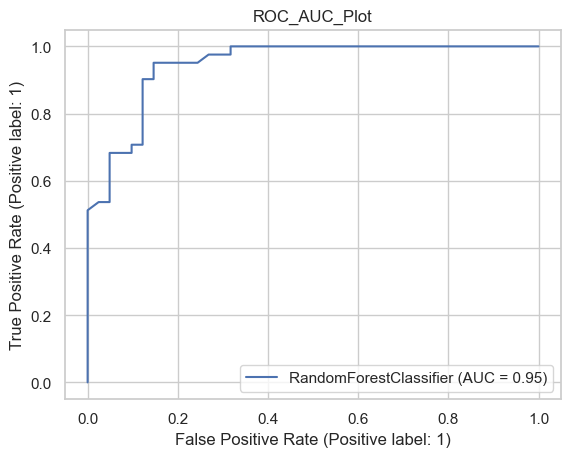

              precision    recall  f1-score   support

           0       0.92      0.85      0.89        41
           1       0.86      0.93      0.89        41

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.89      0.89      0.89        82



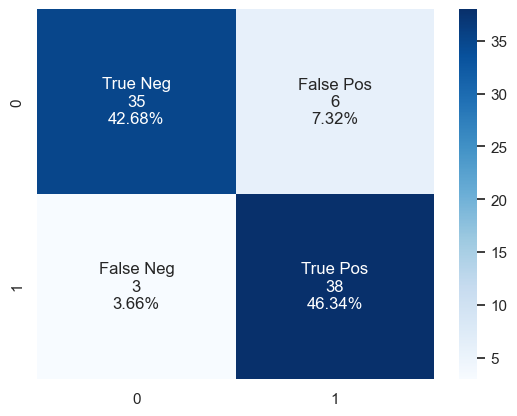

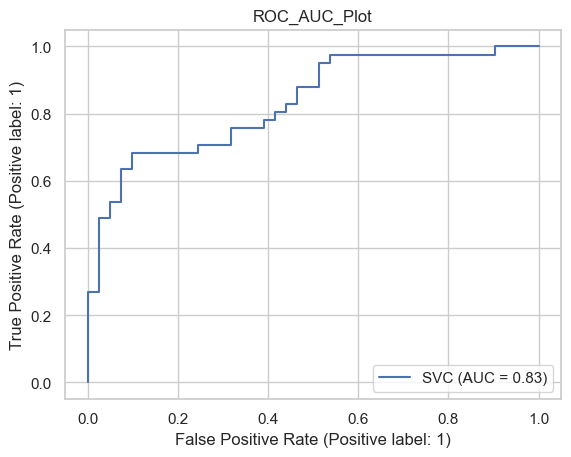

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        41
           1       0.82      0.68      0.75        41

    accuracy                           0.77        82
   macro avg       0.78      0.77      0.77        82
weighted avg       0.78      0.77      0.77        82



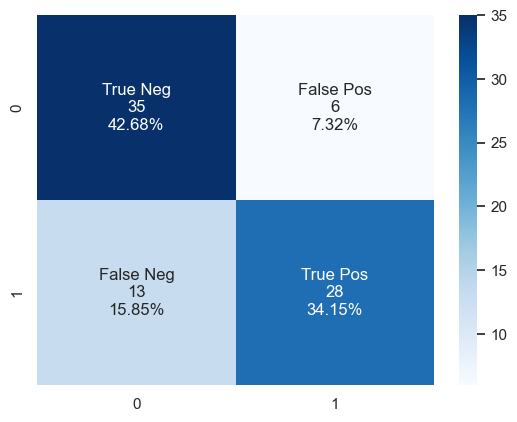

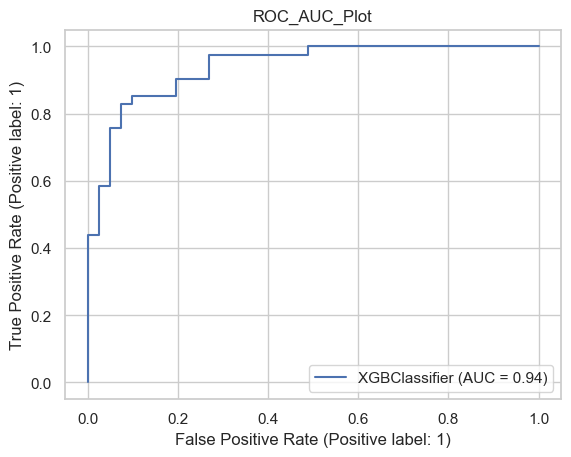

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.83      0.85      0.84        41

    accuracy                           0.84        82
   macro avg       0.84      0.84      0.84        82
weighted avg       0.84      0.84      0.84        82



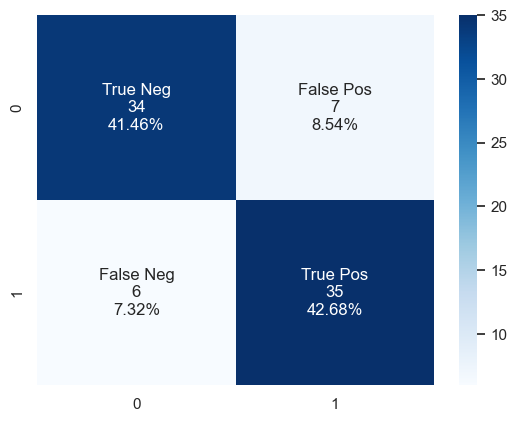

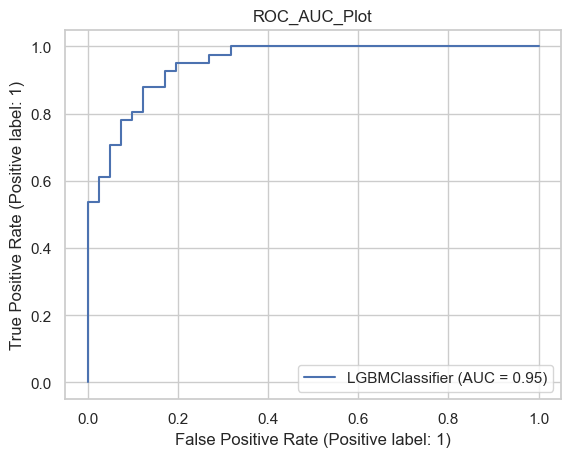

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        41
           1       0.84      0.93      0.88        41

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82



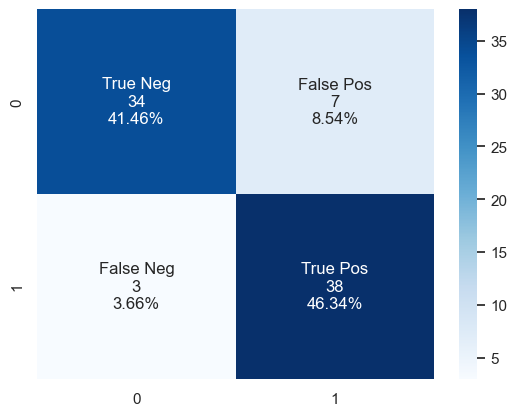

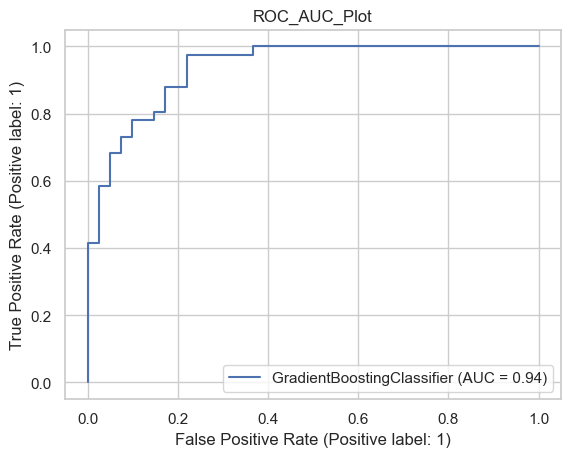

              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.82      0.88      0.85        41

    accuracy                           0.84        82
   macro avg       0.84      0.84      0.84        82
weighted avg       0.84      0.84      0.84        82



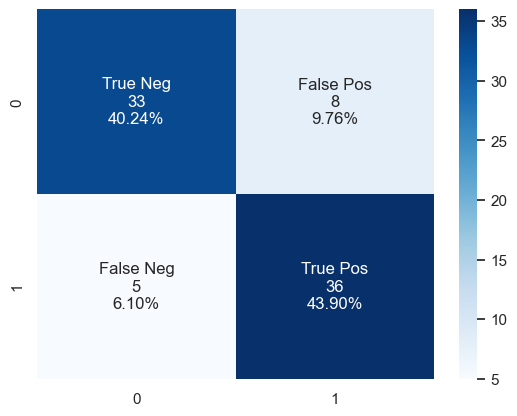

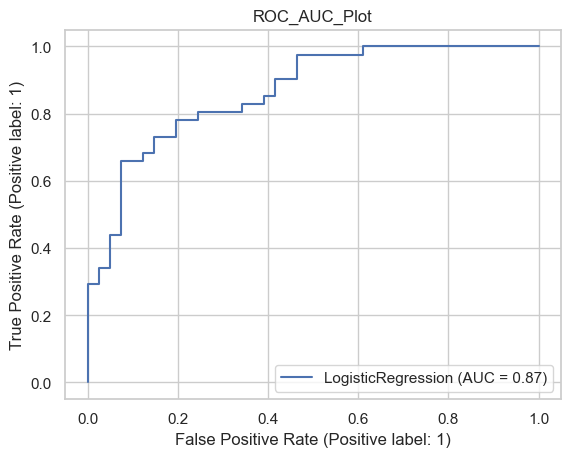

              precision    recall  f1-score   support

           0       0.75      0.80      0.78        41
           1       0.79      0.73      0.76        41

    accuracy                           0.77        82
   macro avg       0.77      0.77      0.77        82
weighted avg       0.77      0.77      0.77        82



Accuracy     ROC Cross Val Score
Classifier                                                  
RandomForest                  89.02%  89.02%          88.78%
SVM                           76.83%  76.83%          80.35%
XGBoost                       84.15%  84.15%          87.14%
LGBMClassifier                87.80%  87.80%          86.62%
Gradient Booster Classifier   84.15%  84.15%          87.65%
Logistic Regression           76.83%  76.83%          79.32%

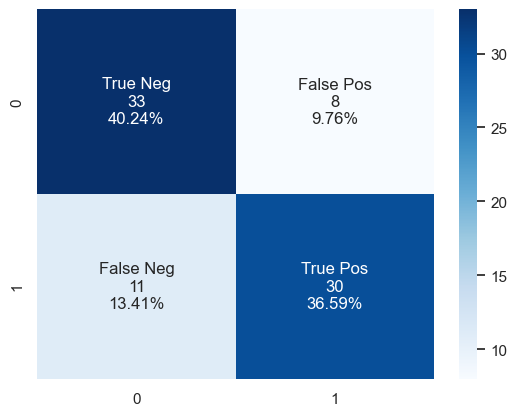

In [40]:
# Call the function
df = train_evaluate_classifiers(x_train1, y_train1, x_test1, y_test1, **classifiers)

# Print the results
df

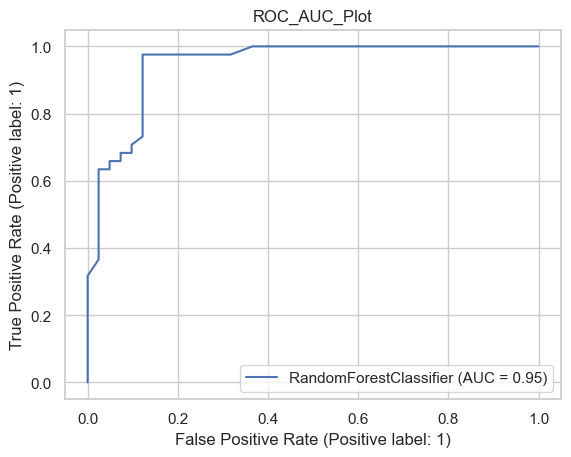

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        41
           1       0.89      0.98      0.93        41

    accuracy                           0.93        82
   macro avg       0.93      0.93      0.93        82
weighted avg       0.93      0.93      0.93        82



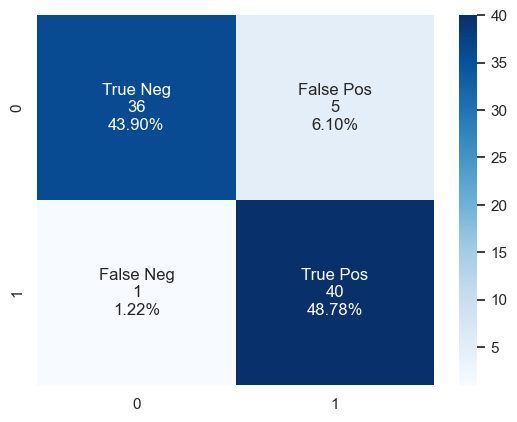

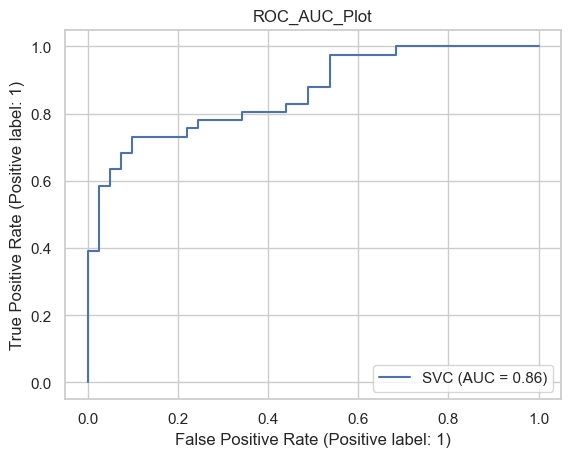

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.78      0.76      0.77        41

    accuracy                           0.77        82
   macro avg       0.77      0.77      0.77        82
weighted avg       0.77      0.77      0.77        82



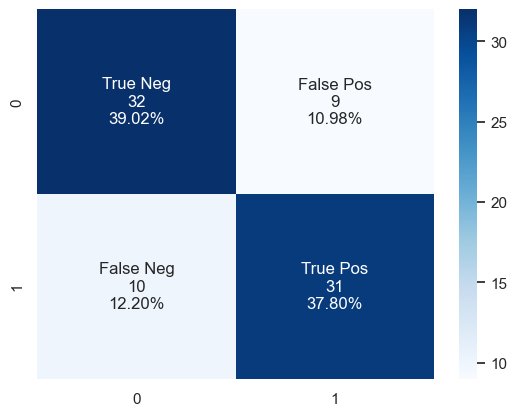

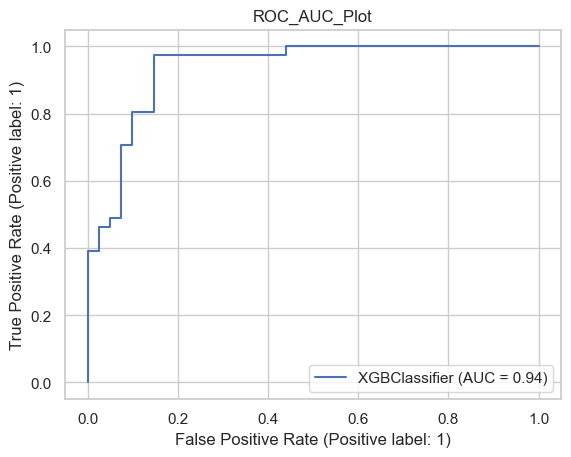

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        41
           1       0.87      0.95      0.91        41

    accuracy                           0.90        82
   macro avg       0.91      0.90      0.90        82
weighted avg       0.91      0.90      0.90        82



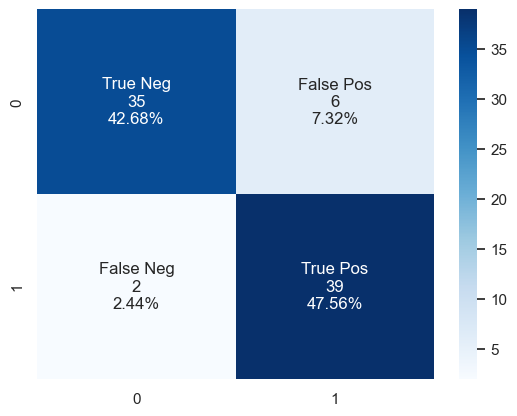

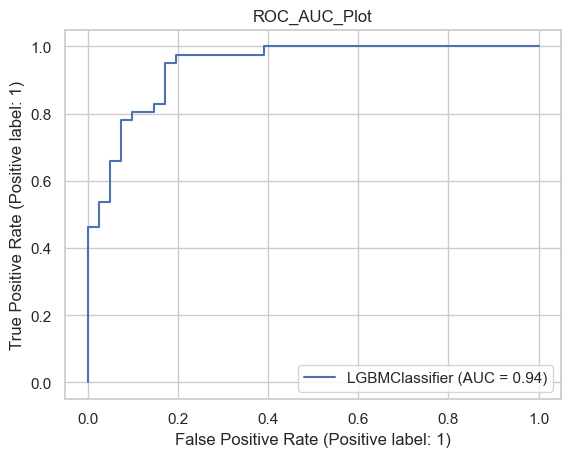

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        41
           1       0.85      0.95      0.90        41

    accuracy                           0.89        82
   macro avg       0.90      0.89      0.89        82
weighted avg       0.90      0.89      0.89        82



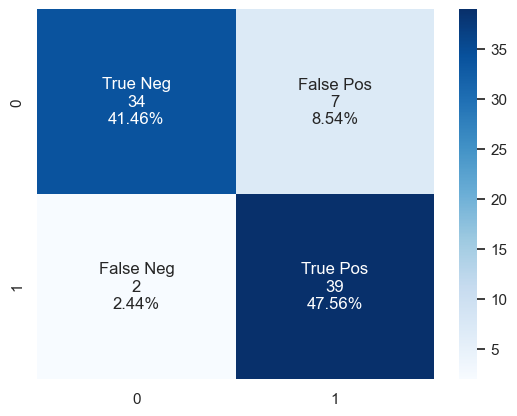

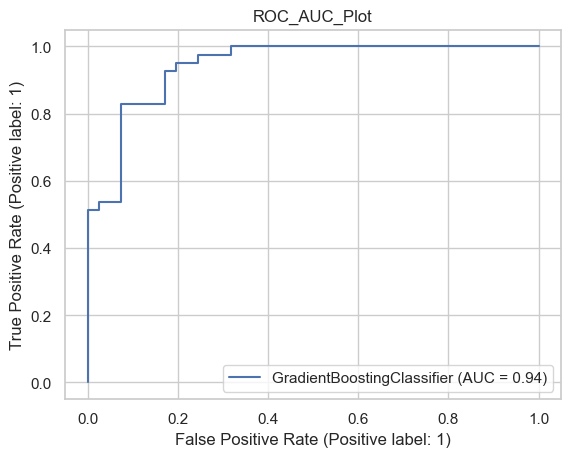

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        41
           1       0.83      0.93      0.87        41

    accuracy                           0.87        82
   macro avg       0.87      0.87      0.87        82
weighted avg       0.87      0.87      0.87        82



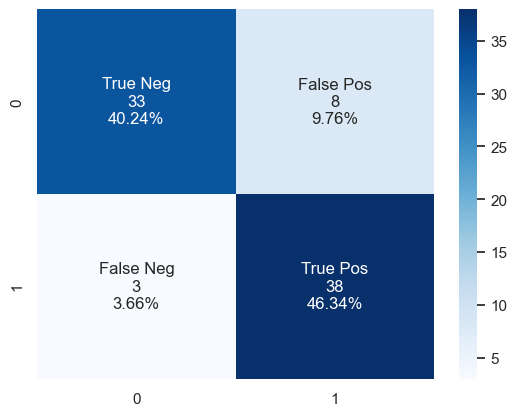

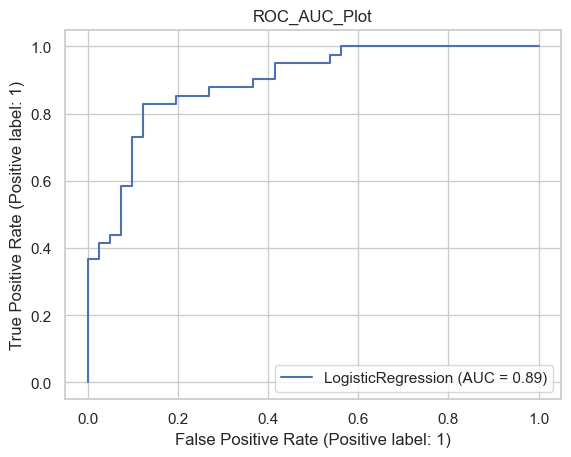

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.80      0.85      0.82        41

    accuracy                           0.82        82
   macro avg       0.82      0.82      0.82        82
weighted avg       0.82      0.82      0.82        82



Accuracy     ROC Cross Val Score
Classifier                                                  
RandomForest                  92.68%  92.68%          89.91%
SVM                           76.83%  76.83%          77.46%
XGBoost                       90.24%  90.24%          88.47%
LGBMClassifier                89.02%  89.02%          87.53%
Gradient Booster Classifier   86.59%  86.59%          87.75%
Logistic Regression           81.71%  81.71%          82.39%

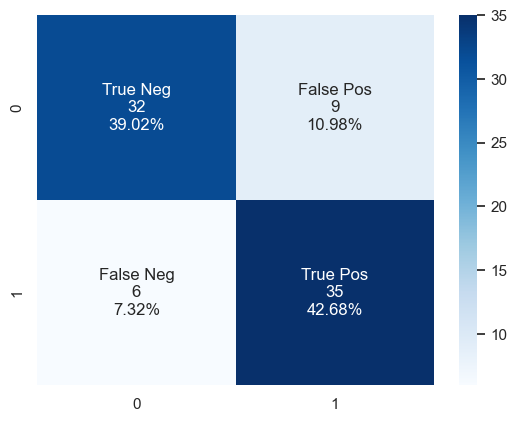

In [41]:
# Call the function
df = train_evaluate_classifiers(x_train2, y_train2, x_test2, y_test2, **classifiers)

# Print the results
df

##### Deductions
From these results it is found that Dataset 2 shows better results and RandomForest is the best model
but statistically, the data suggest Dataset 1 should be used and RandomForest is the best model.

#### Hyperparameter Tuning

In [42]:
automl = AutoML()
settings = {
"time_budget": 10, # total running time in seconds
"metric": 'roc_auc', 
"estimator_list": ['rf'], 
"task": 'classification', 
"log_file_name": './heart_failure_experiment.log', 
"seed": SEED, 
}

automl.fit(x_train1, y_train1, **settings)

[flaml.automl.logger: 10-07 17:22:53] {1679} INFO - task = classification
[flaml.automl.logger: 10-07 17:22:53] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 10-07 17:22:53] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 10-07 17:22:53] {1900} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl.logger: 10-07 17:22:53] {2218} INFO - iteration 0, current learner rf
[flaml.automl.logger: 10-07 17:22:53] {2344} INFO - Estimated sufficient time budget=737s. Estimated necessary time budget=1s.
[flaml.automl.logger: 10-07 17:22:53] {2391} INFO -  at 0.1s,	estimator rf's best error=0.1233,	best estimator rf's best error=0.1233
[flaml.automl.logger: 10-07 17:22:53] {2218} INFO - iteration 1, current learner rf
[flaml.automl.logger: 10-07 17:22:53] {2391} INFO -  at 0.2s,	estimator rf's best error=0.1133,	best estimator rf's best error=0.1133
[flaml.automl.logger: 10-07 17:22:53] {2218} INFO - iteration 2, current learner rf
[flaml.automl.logger: 10

In [45]:
# using flaml hyperparameter tuning
classifiers = {
    'RandomForest': RandomForestClassifier(max_features=0.23217009099485578, max_leaf_nodes=8,
                       n_estimators=13, n_jobs=-1, random_state=12032022),
}

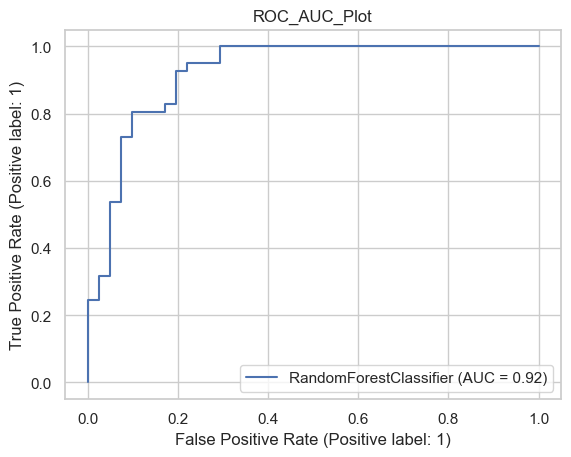

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        41
           1       0.83      0.93      0.87        41

    accuracy                           0.87        82
   macro avg       0.87      0.87      0.87        82
weighted avg       0.87      0.87      0.87        82



Accuracy     ROC Cross Val Score
Classifier                                   
RandomForest   86.59%  86.59%          85.61%

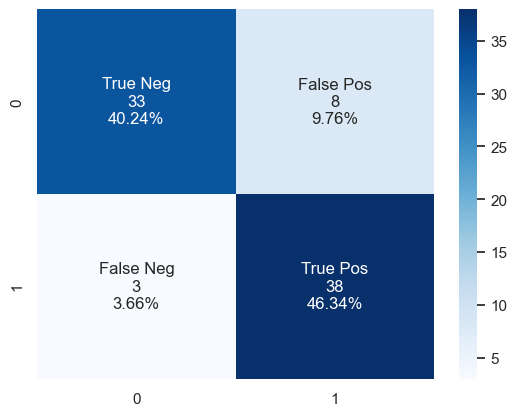

In [46]:
# Call the function
df = train_evaluate_classifiers(x_train1, y_train1, x_test1, y_test1, **classifiers)

# Print the results
df

##### Log metrics from a classification report

In [182]:
def log_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    for key, value in report.items():
        if key == "accuracy":
            experiment.log_metric(key, value)
        else:
            experiment.log_metrics(value, prefix=f"{key}")

In [ ]:
with experiment.train():
    log_classification_report(y_train, clf.predict(x_train1))

with experiment.test():
    log_classification_report(y_test, clf.predict(x_test1))

#### Holdout Evaluation

In [ ]:
experiment.end()